In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Classification on balanced class distributions

The first classification task deals with binary classification on a data set with balanced class distribution. For this we provided a subsampling of the original data set, containing an additional feature called 'Position' with the values "ST" (Stürmer) and "CDM" (Zentrales, defensives Mittelfeld). The classification task is to distinguish these two positions.

In [2]:
balanced = pd.read_csv('data/fifa_balanced.csv')
# input data
X = balanced.drop('Position', axis=1)

# class labels
y = balanced['Position']

At first, print the probabilities of each class.

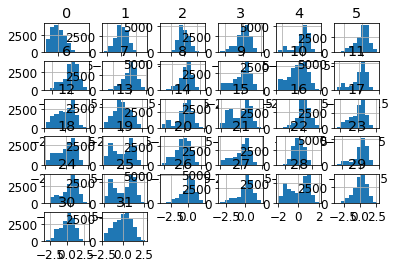

In [23]:
# TODO: plot class probabilities
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

scaler = preprocessing.StandardScaler()
np_scaled = scaler.fit_transform(X)
balanced_normalized = pd.DataFrame(np_scaled)
balanced_normalized.hist()
plt.show()

Now, convert the class labels into numbers (0, 1) by using the sklearn LabelEncoder (http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). This is necessary because typically sklearn classifier prefer numeric data types (holds for input as well as for output).  

In [4]:
from sklearn.preprocessing import LabelEncoder

# TODO: label encode the classes
labels = list(balanced.columns)
le = LabelEncoder()
le.fit(labels)
le.transform(labels)

array([ 1, 18, 22, 27,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 19, 21, 23, 24, 25, 26, 28, 29, 30, 31, 33, 34, 32,
       35, 20], dtype=int64)

After conversion, train and test a Decision Tree as first classifier. Split the input data and the class labels into train (60%) and test data (40%), using the train_test_split function of sklearn (http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Now, train classifier and test it. Calculate and print the reached accuracy.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# TODO: split in test and train data, train and test classifier and print accuracy
validation_size = 0.40
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size)

# Make predictions on validation dataset
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
tree_predictions = tree.predict(X_validation)
print("DecisionTree accuracy: " ,accuracy_score(Y_validation, tree_predictions))

DecisionTree accuracy:  0.969792605951


Now do the same for the k-Nearst-Neighbors classifier (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). 

What do you observe concerning the accuracy and can you find any reasons for that difference in performance? 

Can you imagine ways to solve this problem? Can you even prove that your solution works? 

__Hint:__ Have a closer look at the features and their distribution for different classes.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# TODO: train and test classifier and print accuracy
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_validation)
print("KNeighborsClassifier accuracy: " , accuracy_score(Y_validation, knn_predictions))

KNeighborsClassifier accuracy:  0.665915238954


In [24]:
# TODO: improve KNN
knn = KNeighborsClassifier(algorithm='auto')
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_validation)
print("KNeighborsClassifier accuracy: " , accuracy_score(Y_validation, knn_predictions))

KNeighborsClassifier accuracy:  0.928560972039


### Classification on unbalanced class distributions + Evaluation

Now have a look at some specialties of unbalanced classification tasks. For this, we provide a data set, containing the feature 'Not Aggressive'. It indicates, whether the Aggression of a player has a scoring lower than 80.

In [7]:
unbalanced = pd.read_csv('data/fifa_unbalanced.csv')

X = unbalanced.drop('Not Aggressive', axis=1)

y = unbalanced['Not Aggressive']



Again split the data into tesst (40%) and training set (60%) and train the classifiers Decision Tree, k-Nearst-Neighbors and AwesomeClassifier (already given). Compare ther accuracy on the test set.

What do you observe?

In [8]:
from src.classifier import AwesomeClassifier

# TODO: split in train and test data
validation_size = 0.40
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=validation_size)

# TODO: train and test classifiers and print accuracies
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
tree_predictions = tree.predict(X_validation)
print("DecisionTree accuracy: " ,accuracy_score(Y_validation, tree_predictions))

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(X_validation)
print("KNeighborsClassifier accuracy: " , accuracy_score(Y_validation, knn_predictions))

awesome = AwesomeClassifier().fit(X_train, Y_train)
awesome_predictions = awesome.predict(X_validation)
print("AwesomeClassifier accuracy: " , accuracy_score(Y_validation, awesome_predictions))

DecisionTree accuracy:  0.901185770751
KNeighborsClassifier accuracy:  0.928560972039
AwesomeClassifier accuracy:  0.930171277997


Now, use the predictions and the real classes to calculate a confusion matrix for each classifier, containing:
- true positive (actually positive and predicted as positive)
- false positive (actually negative and predicted as positive)
- true negative (actually negative and predicted as negative)
- false negative (actually positive and predicted as negative)

"Positive" means in theis case, the predicted class label is 'True'. 

__Hints:__
- write them into a DataFrame and output each of them in a separate cell without print statement as in the example below for easier visualization

In [13]:
# example
df = pd.DataFrame(columns=['predicted=False', 'predicted=True'], index=['given=False', 'given=True'],
                  data=[['true negative', 'false positive'], ['false negative', 'true positive']])

df

,predicted=False,predicted=True
given=False,true negative,false positive
given=True,false negative,true positive


In [14]:
# TODO: confusion matrix Awesome classifier
from sklearn.metrics import confusion_matrix
cm_awesome =confusion_matrix(Y_validation, awesome_predictions)
df_awesome = pd.DataFrame(columns=['predicted=False', 'predicted=True'], index=['given=False', 'given=True'],
                  data=cm_awesome)
df_awesome


,predicted=False,predicted=True
given=False,0,477
given=True,0,6354


In [15]:
# TODO: confusion matrix Decision Tree
cm_tree =confusion_matrix(Y_validation, tree_predictions)
df_tree = pd.DataFrame(columns=['predicted=False', 'predicted=True'], index=['given=False', 'given=True'],
                  data=cm_tree)
df_tree

,predicted=False,predicted=True
given=False,161,316
given=True,359,5995


In [16]:
# TODO: confusion matrix KNN
cm_knn =confusion_matrix(Y_validation, knn_predictions)
df_knn = pd.DataFrame(columns=['predicted=False', 'predicted=True'], index=['given=False', 'given=True'],
                  data=cm_knn)
df_knn

,predicted=False,predicted=True
given=False,57,420
given=True,68,6286


Plot each classifier as a point into a ROC diagram with:
- false positive rate (Miss Rate) on the x-axis ($=P(positive~predicted~|~actually~negative)$)
- true positive rate (Sensitivity) on the y-axis ($=P(positive~predicted~|~actually~positive)$)
- each axis from 0 to 1

What do the results tell us about the behaviour of the classifiers?

Can you imagine cases in which other measures than accuracy might be more appropriate?

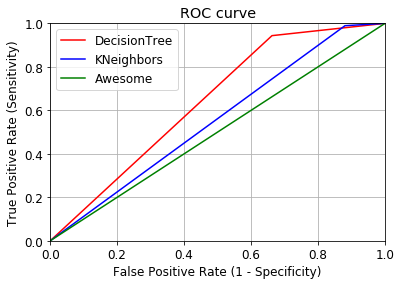

In [12]:
# TODO: ROC diagram
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(Y_validation, tree_predictions)
fpr2, tpr2, thresholds2 = roc_curve(Y_validation, knn_predictions)
fpr3, tpr3, thresholds3 = roc_curve(Y_validation, awesome_predictions)
plt.plot(fpr1, tpr1, c="red", label="DecisionTree") 
plt.plot(fpr2, tpr2, c="blue", label="KNeighbors")
plt.plot(fpr3, tpr3, c="green", label="Awesome")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()